In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
# Load the data
data = pd.read_csv(r"C:\Users\souja\Downloads\archive (2)\mushrooms.csv")

In [3]:
# Data cleaning
print("Data Cleaning:")
print(f"Initial shape of the data: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

Data Cleaning:
Initial shape of the data: (8124, 23)
Shape after removing duplicates: (8124, 23)


In [4]:
# Handle missing values (if any)
if data.isnull().sum().sum() > 0:
    data.fillna(data.mode().iloc[0], inplace=True)
    print("Filled missing values with mode.")

In [5]:
# Data integration (assuming there's more data to integrate, but here it's just a single dataset)
# Normally, you would merge or join different datasets here
print("Data Integration: No additional datasets to integrate.")


Data Integration: No additional datasets to integrate.


In [6]:
# Data transformation
print("Data Transformation:")
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])
    print(f"Encoded {column}")

Data Transformation:
Encoded class
Encoded cap-shape
Encoded cap-surface
Encoded cap-color
Encoded bruises
Encoded odor
Encoded gill-attachment
Encoded gill-spacing
Encoded gill-size
Encoded gill-color
Encoded stalk-shape
Encoded stalk-root
Encoded stalk-surface-above-ring
Encoded stalk-surface-below-ring
Encoded stalk-color-above-ring
Encoded stalk-color-below-ring
Encoded veil-type
Encoded veil-color
Encoded ring-number
Encoded ring-type
Encoded spore-print-color
Encoded population
Encoded habitat


In [7]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print("Data standardized using StandardScaler.")

Data standardized using StandardScaler.


In [8]:
# Feature and target separation
X = data.drop('class', axis=1)
y = data['class']
print("Features and target variable separated.")

Features and target variable separated.


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [10]:
# Select only two features for SVM visualization
X_train_svm = X_train_scaled[:, :2]
X_test_svm = X_test_scaled[:, :2]

In [11]:
# Function to print results and plot confusion matrix
def print_results_and_plot(model_name, y_test, y_pred, model=None):
    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot decision tree if model is Decision Tree or Random Forest
    if model_name in ["Decision Tree", "Random Forest"]:
        plt.figure(figsize=(20, 10))
        if model_name == "Random Forest":
            estimator = model.estimators_[0]
        else:
            estimator = model
        plot_tree(estimator, filled=True, feature_names=X.columns, class_names=le.classes_)
        plt.title(f"{model_name} - Tree Plot")
        plt.show()

    # Plot linear regression line with actual and predicted points connected
    if model_name == "Linear Regression":
        plt.figure(figsize=(6, 4))
        plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual')
        plt.scatter(X_test_scaled[:, 0], y_pred, color='red', marker='o', label='Predicted')
        plt.title(f"{model_name}")
        plt.xlabel('Feature 1 (Standardized)')
        plt.ylabel('Class')
        plt.legend()
        plt.show()

    # Plot logistic regression sigmoid curve
    if model_name == "Logistic Regression":
        plt.figure(figsize=(6, 4))
        plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual')
        X_test_sorted = np.sort(X_test_scaled[:, 0])
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        plt.plot(X_test_sorted, 1 / (1 + np.exp(-X_test_sorted * model.coef_[0][0] - model.intercept_[0])), color='red', label='Sigmoid Curve')
        plt.title(f"{model_name}")
        plt.xlabel('Feature 1 (Standardized)')
        plt.ylabel('Probability')
        plt.legend()
        plt.show()

    # Plot SVM decision boundary for non-linear SVM
    if model_name == "Support Vector Machine":
        plt.figure(figsize=(6, 4))
        X_set, y_set = X_test_svm, y_test
        X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                             np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
        plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha=0.75, cmap=plt.cm.Paired)
        plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolor='k', s=20, cmap=plt.cm.Paired)
        plt.title(f"{model_name}")
        plt.xlabel('Feature 1 (Standardized)')
        plt.ylabel('Feature 2 (Standardized)')
        plt.show()


Linear Regression
Accuracy: 0.9452307692307692
Confusion Matrix:
[[802  41]
 [ 48 734]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       843
           1       0.95      0.94      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



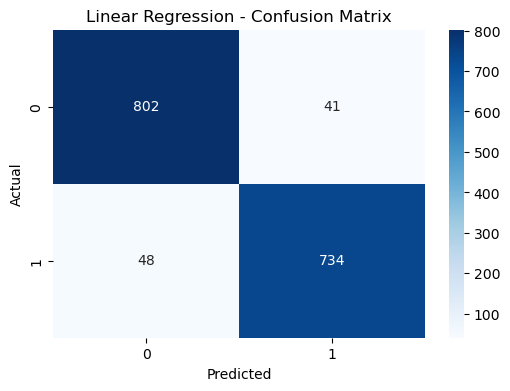

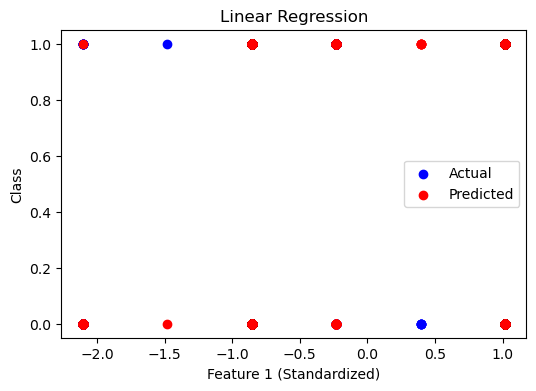

In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled).round()
print_results_and_plot("Linear Regression", y_test, y_pred_lr)


Logistic Regression
Accuracy: 0.952
Confusion Matrix:
[[799  44]
 [ 34 748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



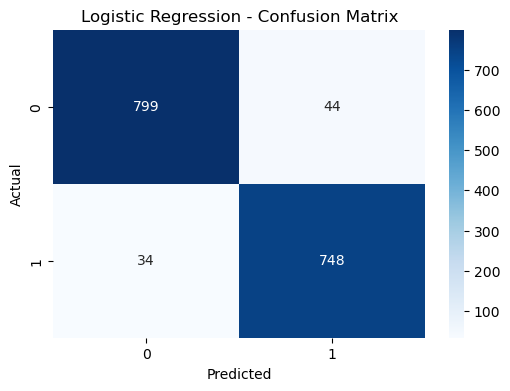

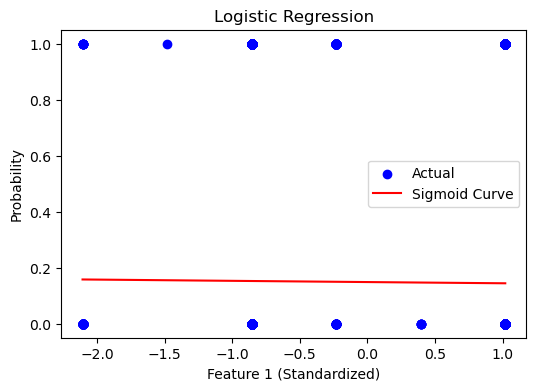

In [13]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print_results_and_plot("Logistic Regression", y_test, y_pred_log_reg, model=log_reg)


Support Vector Machine
Accuracy: 0.6123076923076923
Confusion Matrix:
[[525 318]
 [312 470]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       843
           1       0.60      0.60      0.60       782

    accuracy                           0.61      1625
   macro avg       0.61      0.61      0.61      1625
weighted avg       0.61      0.61      0.61      1625



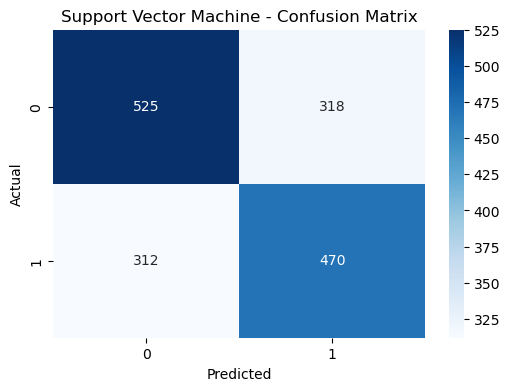

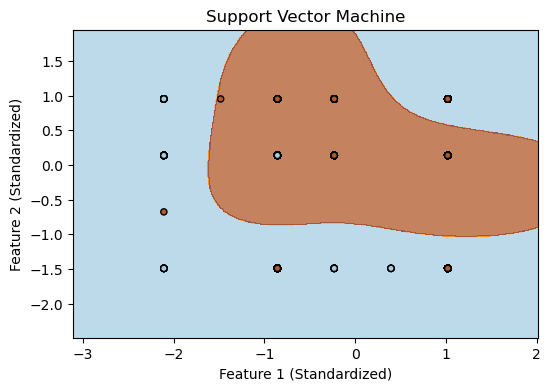

In [14]:
# SVM
svm = SVC(kernel='rbf')
svm.fit(X_train_svm, y_train)
y_pred_svm = svm.predict(X_test_svm)
print_results_and_plot("Support Vector Machine", y_test, y_pred_svm, model=svm)



Decision Tree
Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



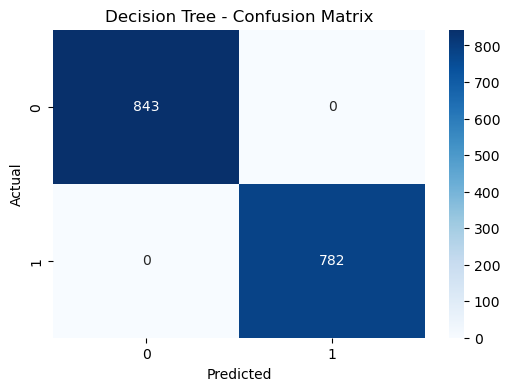

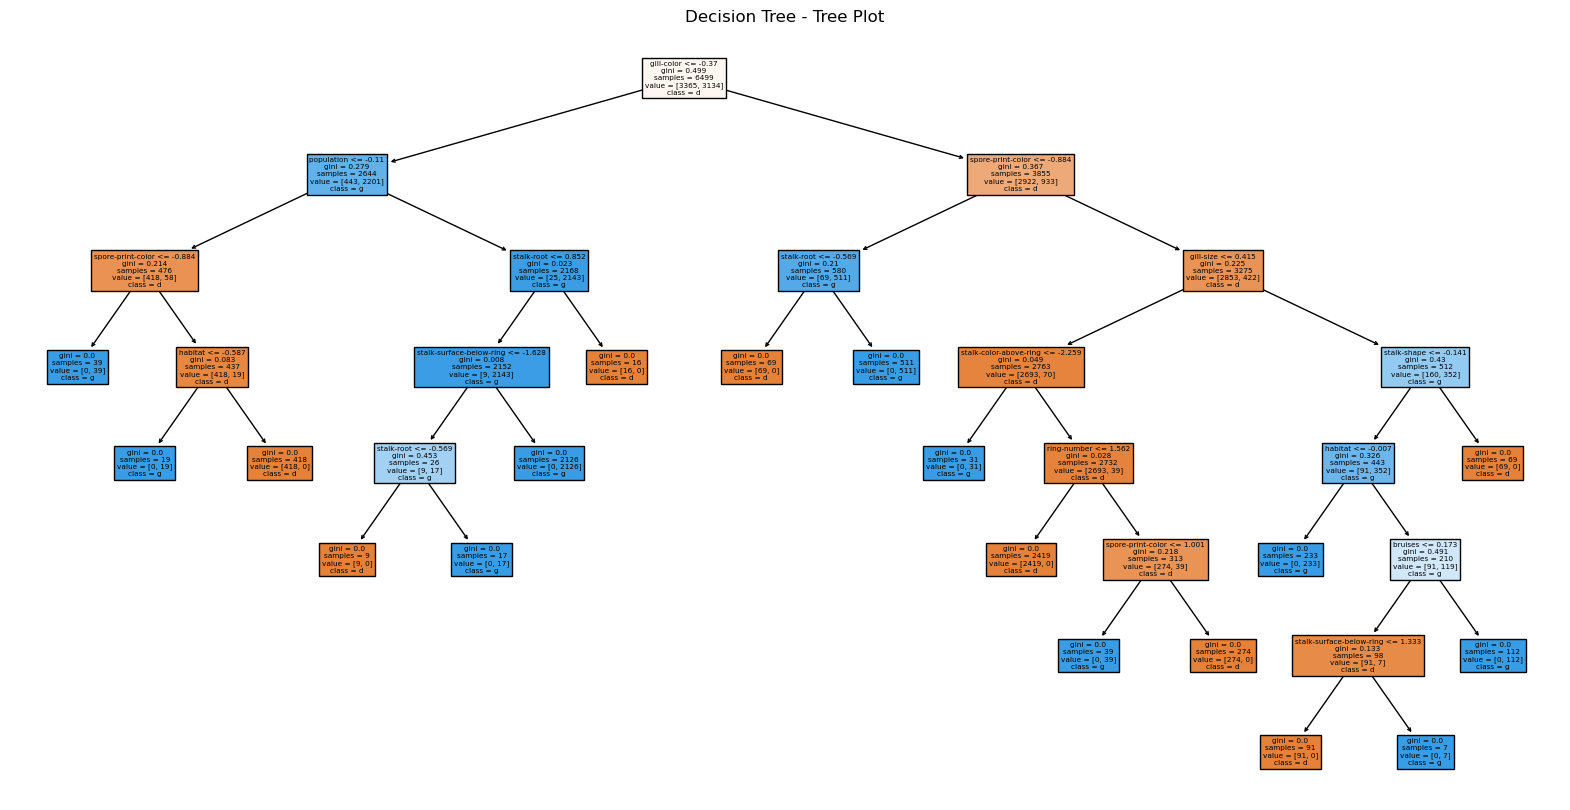

In [15]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print_results_and_plot("Decision Tree", y_test, y_pred_dt, model=dt)


Random Forest
Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



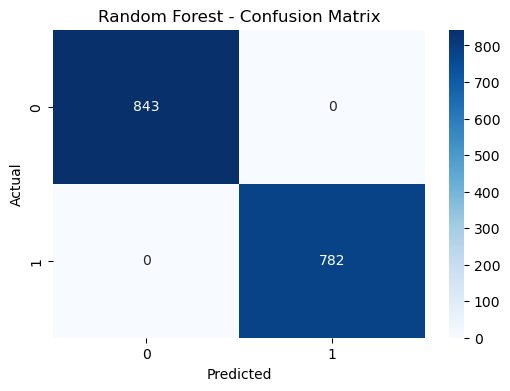

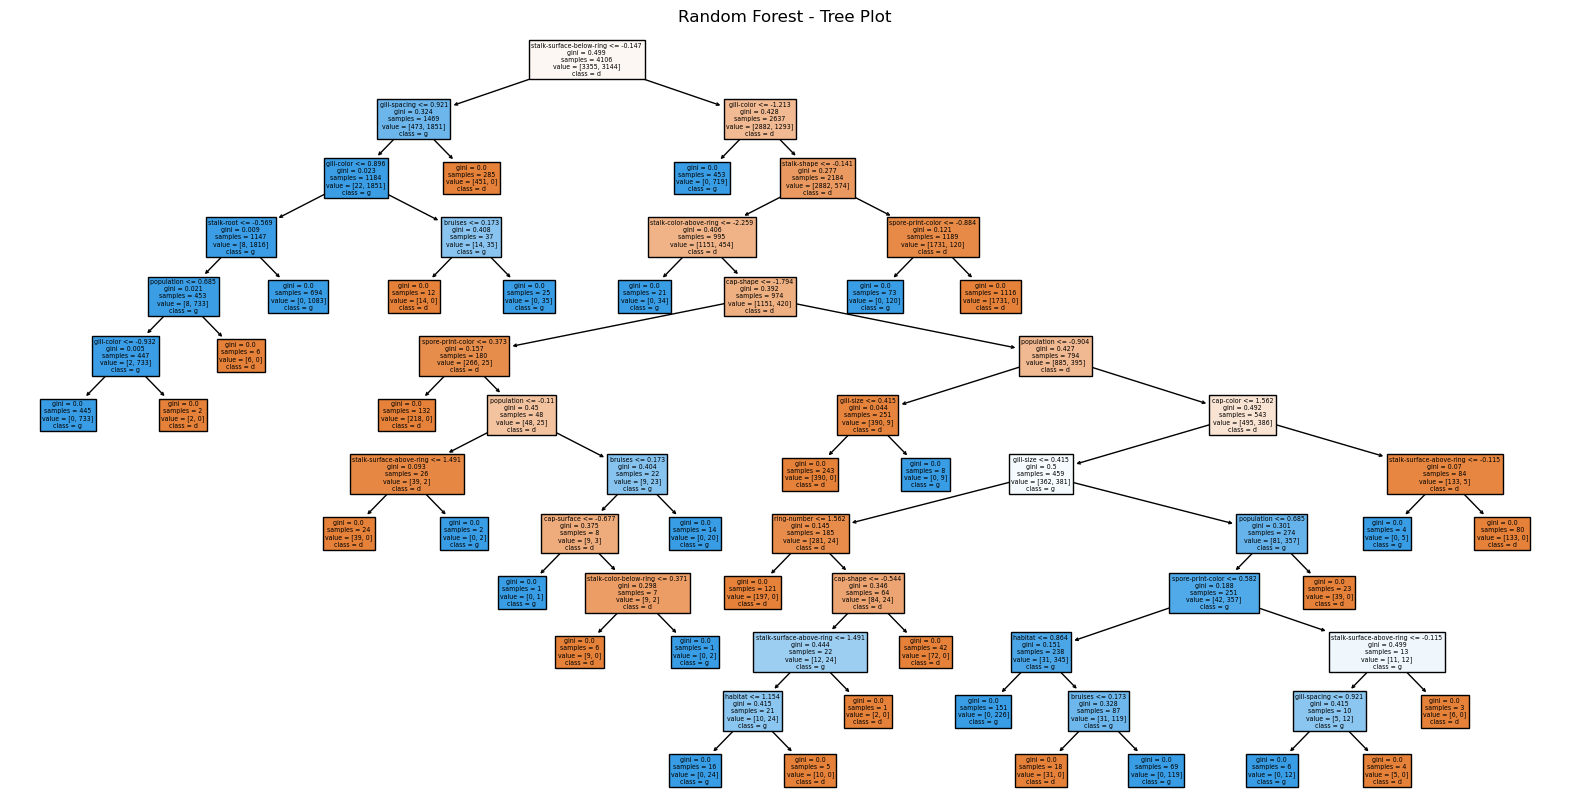

In [28]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print_results_and_plot("Random Forest", y_test, y_pred_rf, model=rf)


Naive Bayes
Accuracy: 0.9218461538461539
Confusion Matrix:
[[771  72]
 [ 55 727]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



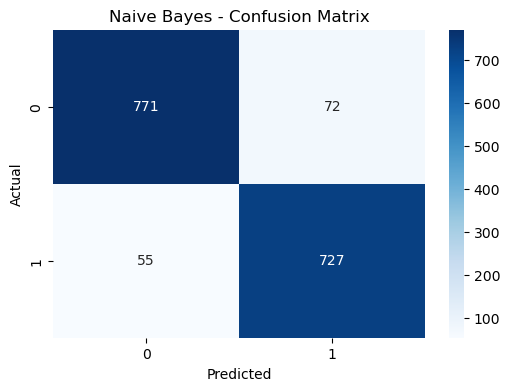

In [22]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print_results_and_plot("Naive Bayes", y_test, y_pred_nb)



K-Nearest Neighbors
Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



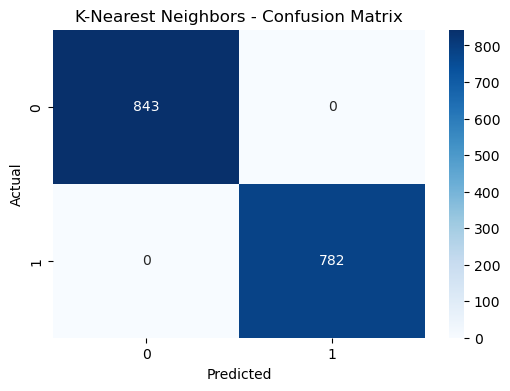

In [18]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print_results_and_plot("K-Nearest Neighbors", y_test, y_pred_knn)

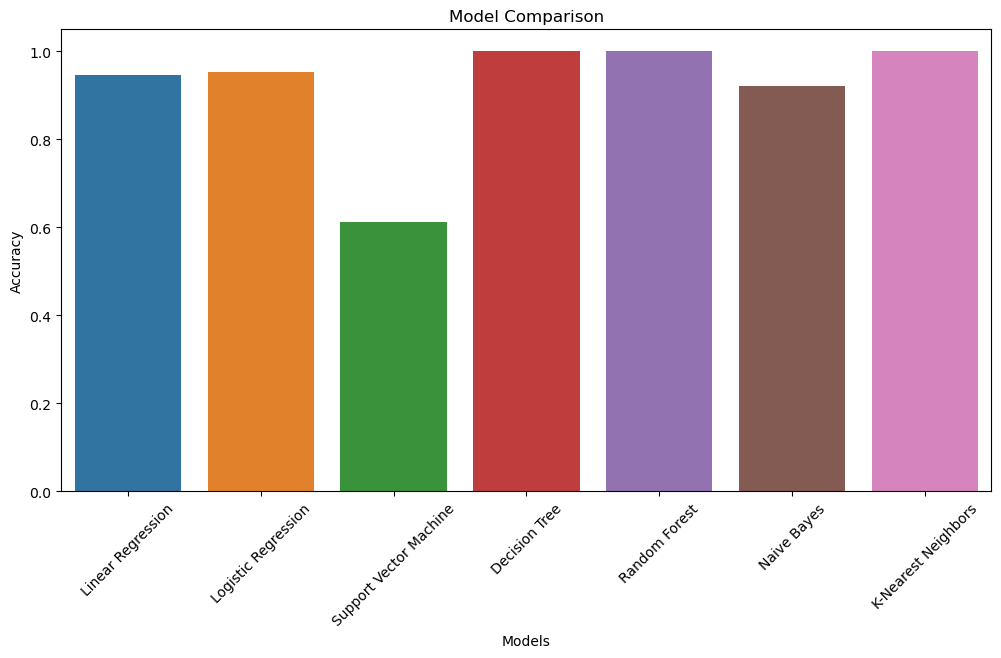

In [19]:
# Visualization of model comparison
models = ["Linear Regression", "Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "Naive Bayes", "K-Nearest Neighbors"]
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nb),
              accuracy_score(y_test, y_pred_knn)]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()

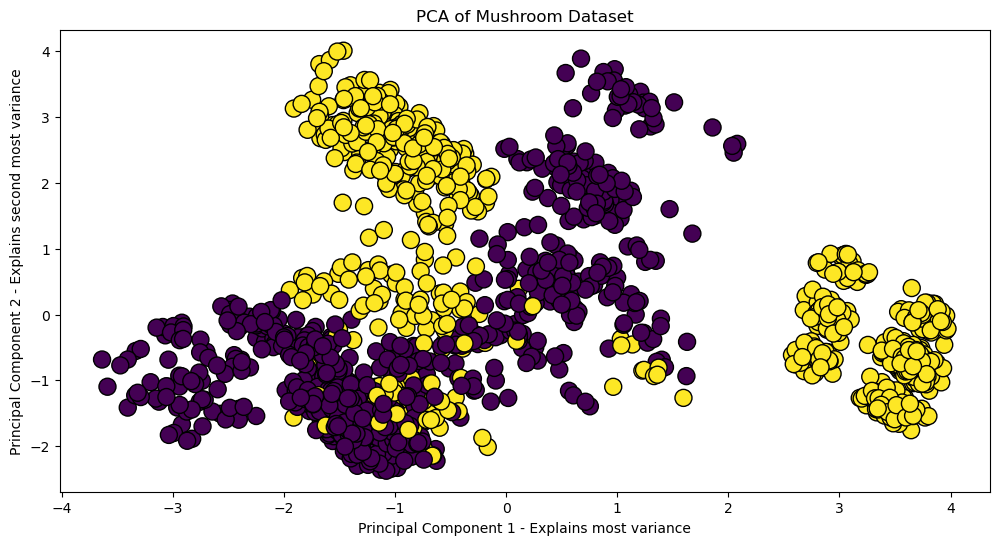

In [20]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=150)
plt.title('PCA of Mushroom Dataset')
plt.xlabel('Principal Component 1 - Explains most variance')
plt.ylabel('Principal Component 2 - Explains second most variance')
plt.show()